## Projeto: Data Cleaning

### Pergunta: Qual País possui mais ataques fatais? 

In [57]:
import pandas as pd
import numpy as np
import re

In [58]:
# Importanto o arquivo CSV

df = pd.read_csv ('C:/Users/giuli/Desktop/Projeto_Shark Attack/attacks.csv' , encoding = 'latin-1')

In [59]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [60]:
df. shape

(25723, 24)

In [61]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [62]:
#Eliminar colunas que até o momento julgo desnecessárias

df = df.drop (["Date" , "Case Number" , "Year" , "Area" , "Type" , "Location" , "Activity" , "Name" , "Age" , "Injury" , "Time" , "Name" , "Age" , "Investigator or Source" , "pdf" , "href formula" , "href" , "Case Number.1", "Case Number.2", "original order", "Unnamed: 22", "Unnamed: 23"], axis=1) 

In [63]:
df 

,Country,Sex,Fatal (Y/N),Species
0,USA,F,N,White shark
1,USA,F,N,NaN
2,USA,M,N,NaN
3,AUSTRALIA,M,N,2 m shark
4,MEXICO,M,N,"Tiger shark, 3m"
...,...,...,...,...
25718,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN


In [64]:
df.shape

(25723, 4)

In [65]:
# Eliminar linhas, permanecendo apenas com as que possuem dados

df = df.loc[0:6303]

In [66]:
df

,Country,Sex,Fatal (Y/N),Species
0,USA,F,N,White shark
1,USA,F,N,NaN
2,USA,M,N,NaN
3,AUSTRALIA,M,N,2 m shark
4,MEXICO,M,N,"Tiger shark, 3m"
...,...,...,...,...
6299,USA,M,Y,NaN
6300,PANAMA,M,Y,NaN
6301,CEYLON (SRI LANKA),M,Y,NaN
6302,NaN,NaN,NaN,NaN


In [67]:
# Renomeando as colunas

df = df.rename(columns={'Species ': 'Especies'})
df = df.rename(columns={'Country': 'Paises'})
df = df.rename(columns={'Sex ': 'Sexo'})
df = df.rename(columns={'Fatal (Y/N)': 'Fatal'})

In [68]:
df

,Paises,Sexo,Fatal,Especies
0,USA,F,N,White shark
1,USA,F,N,NaN
2,USA,M,N,NaN
3,AUSTRALIA,M,N,2 m shark
4,MEXICO,M,N,"Tiger shark, 3m"
...,...,...,...,...
6299,USA,M,Y,NaN
6300,PANAMA,M,Y,NaN
6301,CEYLON (SRI LANKA),M,Y,NaN
6302,NaN,NaN,NaN,NaN


In [69]:
# Verificando a quantidade de NaN em cada coluna

df.isnull().sum()

Paises        52
Sexo         567
Fatal        541
Especies    2840
dtype: int64

In [73]:
# Verificando a porcentagem de NaN

percentual_faltantes = (df.isnull ().sum() / len(df))
percentual_faltantes.head()

Paises      0.008249
Sexo        0.089943
Fatal       0.085819
Especies    0.450508
dtype: float64

In [75]:
# Substituis os dados faltantes (NaN) por Strings

df = df[['Paises','Sexo','Fatal','Especies']].fillna('Sem informação')
df.head()

,Paises,Sexo,Fatal,Especies
0,USA,F,N,White shark
1,USA,F,N,Sem informação
2,USA,M,N,Sem informação
3,AUSTRALIA,M,N,2 m shark
4,MEXICO,M,N,"Tiger shark, 3m"


In [77]:
# Instalando Missingno para uma melhor visualização dos dados nulos

!pip install missingno
import missingno as msno

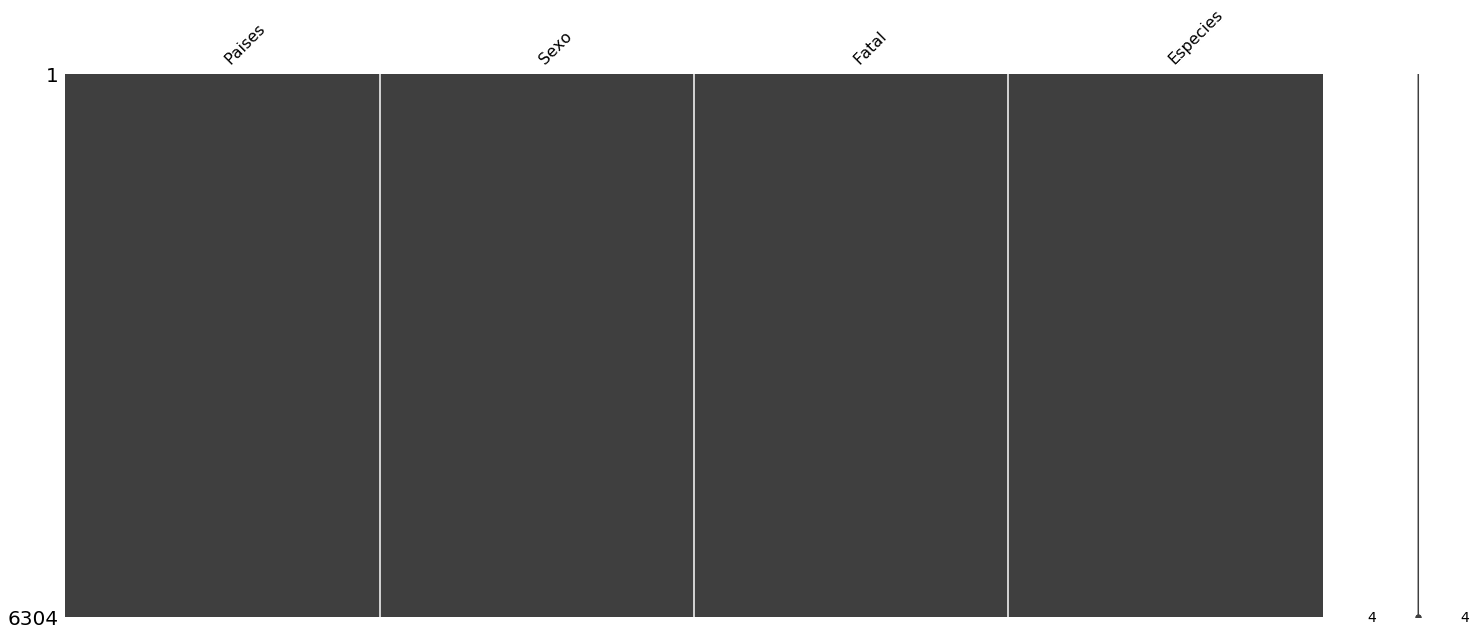

In [78]:
msno.matrix(df)

In [81]:
# Observando os valores de cada coluna

df['Fatal'].value_counts()

N                 4293
Y                 1388
Sem informação     541
UNKNOWN             71
 N                   7
2017                 1
N                    1
y                    1
M                    1
Name: Fatal, dtype: int64

In [82]:
df['Paises'].value_counts()

USA                       2229
AUSTRALIA                 1338
SOUTH AFRICA               579
PAPUA NEW GUINEA           134
NEW ZEALAND                128
                          ... 
GULF OF ADEN                 1
DJIBOUTI                     1
GABON                        1
SAN DOMINGO                  1
BRITISH VIRGIN ISLANDS       1
Name: Paises, Length: 213, dtype: int64

In [83]:
df['Sexo'].value_counts()

M                 5094
F                  637
Sem informação     567
M                    2
N                    2
lli                  1
.                    1
Name: Sexo, dtype: int64

In [84]:
df['Especies'].value_counts()

Sem informação                                                    2840
White shark                                                        163
Shark involvement prior to death was not confirmed                 105
Invalid                                                            102
Shark involvement not confirmed                                     88
                                                                  ... 
60 cm to 90 cm [2' to 3'] blacktip or spinner shark                  1
3 m [10'], 270- kg [595-lb] shark                                    1
 Blacktip shark, C. maculipinnis. 1.9 m to 2.1 m [6.5' to 7']        1
Mako shark, 125-lb                                                   1
Lemon shark pup                                                      1
Name: Especies, Length: 1550, dtype: int64

In [85]:
# Agrupando colunas

df.groupby('Fatal').count()

,Paises,Sexo,Especies
Fatal,,,
N,7,7,7
2017,1,1,1
M,1,1,1
N,4293,4293,4293
N,1,1,1
Sem informação,541,541,541
UNKNOWN,71,71,71
Y,1388,1388,1388
y,1,1,1


In [86]:
df.groupby('Fatal').describe().reset_index()

Fatal Paises                                 Sexo         \
                   count unique               top  freq count unique   
0               N      7      3         AUSTRALIA     5     7      2   
1            2017      1      1             ITALY     1     1      1   
2               M      1      1  FRENCH POLYNESIA     1     1      1   
3               N   4293    154               USA  1837  4293      6   
4              N       1      1         AUSTRALIA     1     1      1   
5  Sem informação    541     76               USA   188   541      3   
6         UNKNOWN     71     23         AUSTRALIA    21    71      3   
7               Y   1388    148         AUSTRALIA   283  1388      5   
8               y      1      1            TOBAGO     1     1      1   

                        Especies         \
              top  freq    count unique   
0               M     6        7      6   
1               M     1        1      1   
2               M     1        1      1   
3               M  3474     4293   1303   
4  Sem informação     1        1      1   
5               M   403      541     65   
6               M    36       71     16   
7               M  1172     1388    275   
8               M     1        1      1   

                                                            
                                                 top  freq  
0                                     Sem informação     2  
1                                   Blue shark, 2.5m     1  
2                               Grey reef shark, 2 m     1  
3                                     Sem informação  1796  
4                                     Sem informação     1  
5  Shark involvement prior to death was not confi...   104  
6                                     Sem informação    54  
7                                     Sem informação   961  
8                                     Sem informação     1

In [87]:
# Usar mask

mask = df['Fatal'] =='Y'

In [88]:
df.query('Fatal == "Y"').count()

Paises      1388
Sexo        1388
Fatal       1388
Especies    1388
dtype: int64